First, load the data,in this notebook we are using the marker_IBD data from Lu's github

In [6]:
def loadDisease_marker_IBD(inputF="./Data/Data_US_Gut//marker_IBD.txt"):
    df=pd.read_csv(inputF,delimiter="\t", index_col=0, header=None).T
    lastLabelIndex=df.columns.get_loc("group")
    df_data=df.iloc[:,lastLabelIndex+1:].copy()
    label=list(df["disease"])
    label_binary=[0 if x=="n" else 1 for x in label]
    return np.asarray(df_data),label_binary

In [15]:
import sys
sys.path.append('./Code')
import loadData 
import RunML
import RunML_continue
import FS
import metric

import pandas as pd
import numpy as np
import random
import time
from collections import Counter

In [54]:
df=pd.read_csv("./Data/Data_US_Gut/abundance_IBD.txt",delimiter="\t", index_col=0, header=None).T

In [55]:
df.shape

(110, 654)

In [59]:
df.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Gracilibacillus|s__Gracilibacillus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_amylovorus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_johnsonii,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_saerimneri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_ultunensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Pediococcus|s__Pediococcus_lolii,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XI_Incertae_Sedis|g__Peptoniphilus|s__Peptoniphilus_sp_oral_taxon_375,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Acidaminococcaceae|g__Acidaminococcus|s__Acidaminococcus_sp_HPA0509,k__Bacteria|p__Proteobacteria|c__Epsilonproteobacteria|o__Campylobacterales|f__Helicobacteraceae|g__Helicobacter|s__Helicobacter_pullorum,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Candidatus_Moranella|s__Candidatus_Moranella_endobia
1,metahit,MH0002,mh0002,stool,n,59,female,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
2,metahit,MH0003,mh0003,stool,n,69,male,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
3,metahit,MH0006,mh0006,stool,n,59,female,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
4,metahit,MH0009,mh0009,stool,n,64,male,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
5,metahit,MH0011,mh0011,stool,n,0,female,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df2 = pd.read_csv("./Data/Data_US_Gut/marker_IBD.txt",delimiter="\t", index_col=0, header=None).T

/tmp/ipykernel_3992261/3091164482.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("./Data/Data_US_Gut/marker_IBD.txt",delimiter="\t", index_col=0, header=None).T


In [61]:
df2.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,gi|73661309|ref|NC_007350.1|:c2199328-2198963,gi|73661309|ref|NC_007350.1|:c2435149-2434814,gi|74316018|ref|NC_007404.1|:c740988-740503,gi|83317253|ref|XM_725987.1|,gi|85690960|ref|XM_960787.1|,gi|86156430|ref|NC_007760.1|:c2866318-2864624,gi|88607955|ref|NC_007798.1|:501204-502199,gi|88657561|ref|NC_007799.1|:c987429-987058,gi|91772082|ref|NC_007955.1|:c621249-619816,gi|94676460|ref|NC_007984.1|:358529-358876
1,metahit,MH0002,mh0002,stool,n,59,female,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
2,metahit,MH0003,mh0003,stool,n,69,male,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
3,metahit,MH0006,mh0006,stool,n,59,female,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
4,metahit,MH0009,mh0009,stool,n,64,male,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0
5,metahit,MH0011,mh0011,stool,n,0,female,denmark,Illumina,20203603,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_IBD,y_IBD=loadDisease_marker_IBD("./Data/Data_US_Gut//marker_IBD.txt")
print("Finished Loading Data")
print(y_IBD)

/tmp/ipykernel_3992261/1906584331.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(inputF,delimiter="\t", index_col=0, header=None).T


In [12]:
X_IBD.shape

(110, 91756)

In [13]:
len(y_IBD)

110

In [16]:
Counter(y_IBD)

Counter({0: 85, 1: 25})

In [17]:
X_IBD

array([['1', '1', '1', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0],
       ...,
       ['0', '0', '0', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0]], dtype=object)

Perform multiLabel feature selection, this is done by calculating Kruskal-Wallis H-test on each OTU for each environmental factor, each OTU/ASV is given a weighted h score.

/lustre/isaac/scratch/mhe8/SelectMicro_24/./Code/FS.py:95: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


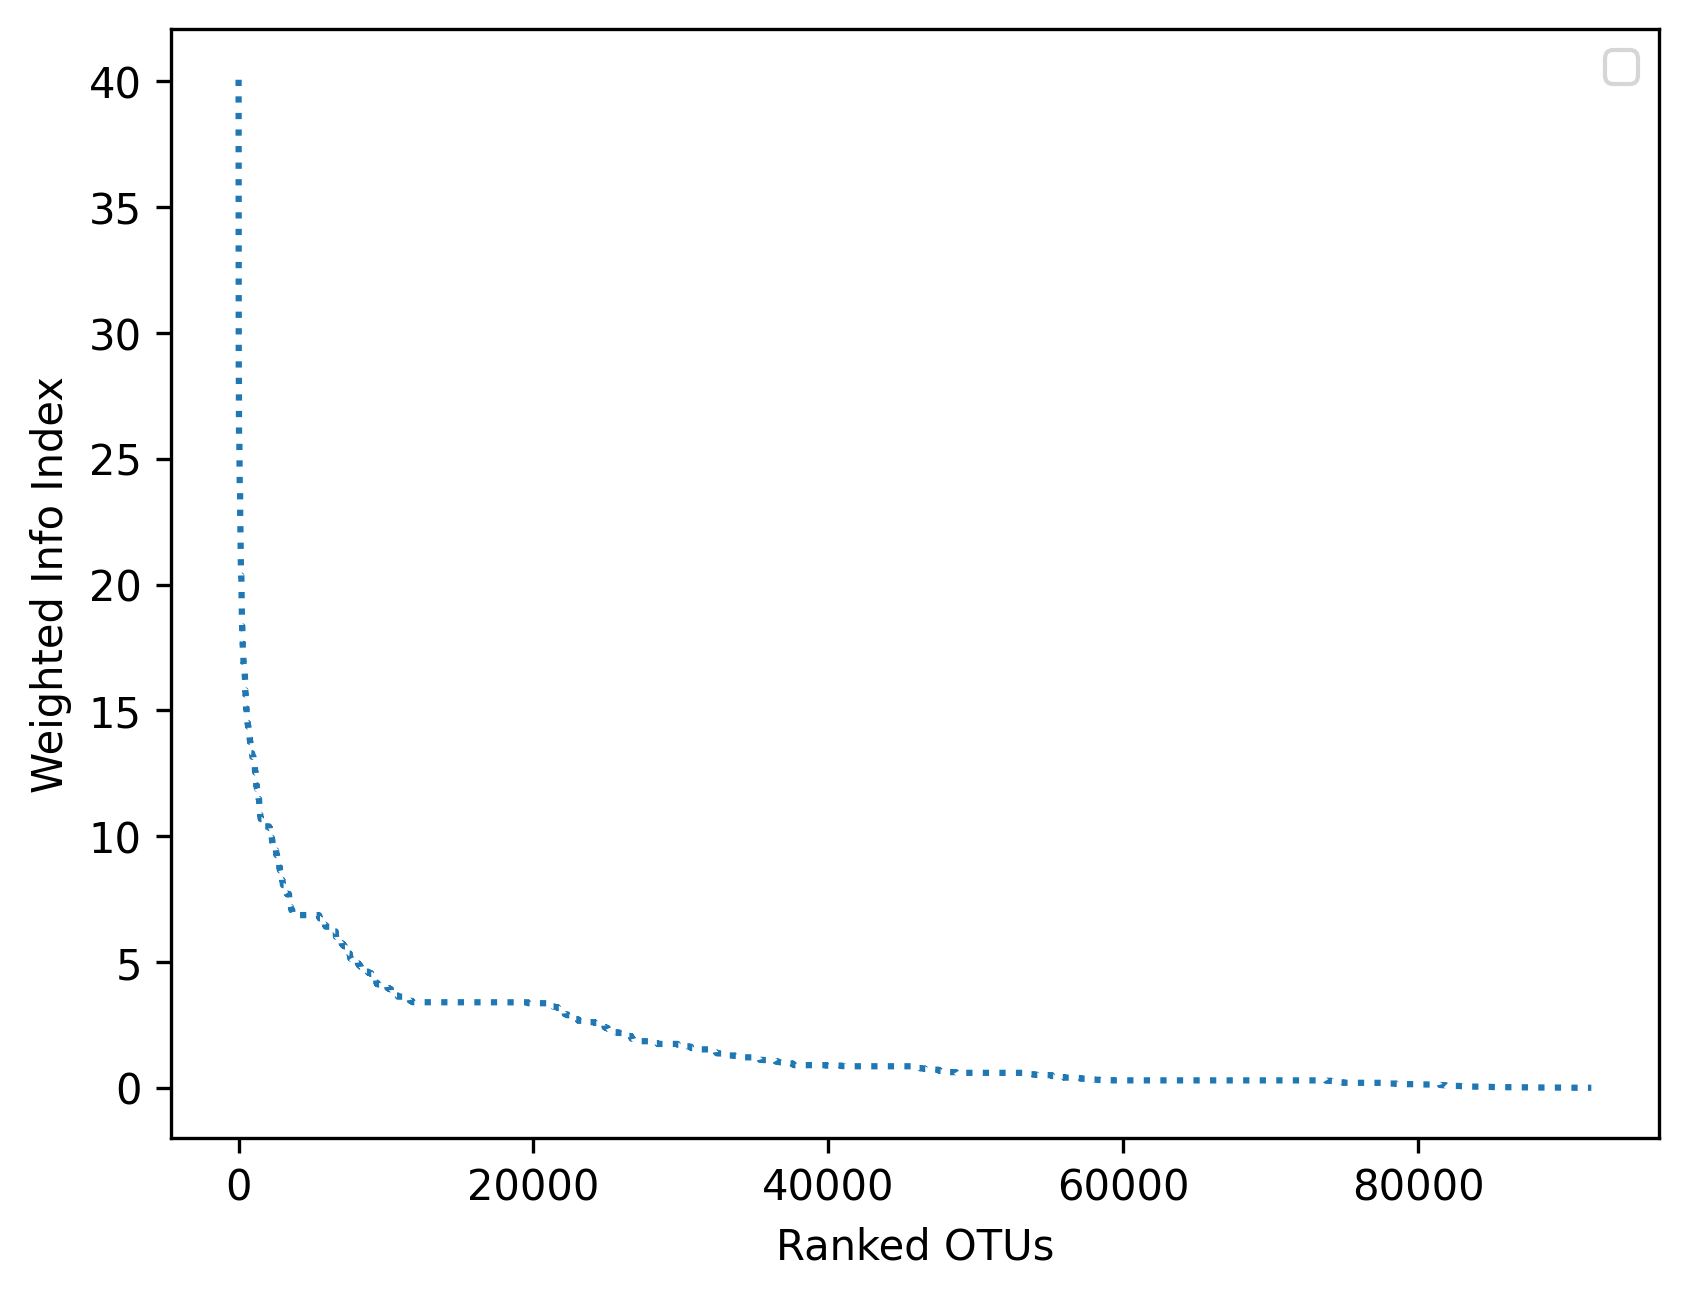

In [20]:
weights=FS.singleLabelFeatureWeighting(X_IBD,y_IBD)
FS.plotWeightedIndex(weights)

11019


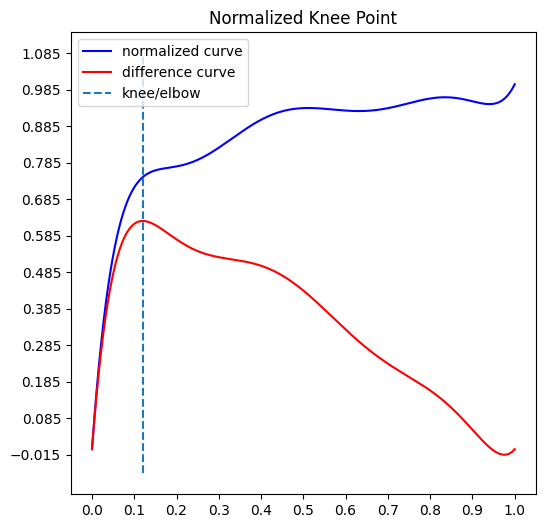

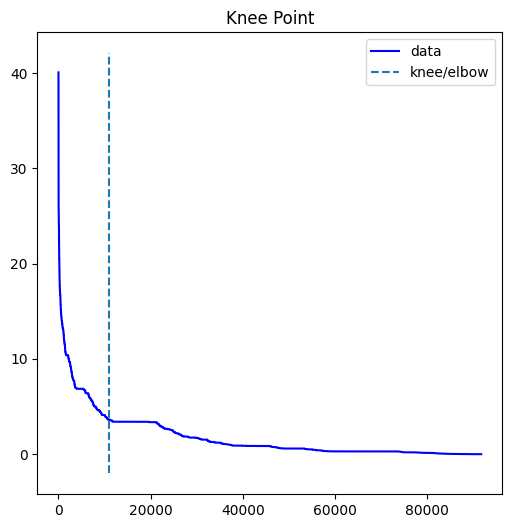

In [23]:
scores=(sorted(weights,reverse=True))
eps=FS.elbowPoint(scores)
print(eps)

In [24]:
topFeature_selected=eps

X_FS,selectedOTU_index=FS.feature_select_singleLabel(X_IBD,y_IBD,topFeature=topFeature_selected)
print (np.shape(X_FS))

(110, 11019)


In [25]:
print(len(weights))

91756


In [28]:
iter =10
cls = ["RF","SVM"]

In [29]:
iter =10
cls = ["RF","SVM"]

In [32]:
targetLabel=pd.Series(y_IBD)
data = X_IBD

In [33]:
X_lasso = RunML.LassoFeatureSelection(data,targetLabel)# this is depend on the target variable(do not update here)
data_subset = {"AllFeatures":data, 
               "SelectMicro": X_FS,
               "Lasso":X_lasso,
               "Random":data
              }

In [34]:
start_time = time.time()
dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,N=iter,classifiers=cls)
end_time = time.time()
print(f"It took {end_time - start_time:.2f} seconds")

             RF_Accuracy    RF_AUC  SVM_Accuracy   SVM_AUC
AllFeatures     0.790909  0.852941      0.809091  0.902353
SelectMicro     0.836364  0.938824      0.945455  0.988235
Lasso           0.890909  0.903529      0.890909  0.896471
Random          0.784545  0.871176      0.811818  0.902353
It took 75.63 seconds


In [43]:
import pickle

# Save dictionary to a pickle file
with open('results/dict_cm_gutIBD_marker.pkl', 'wb') as pickle_file:
    pickle.dump(dict_cm, pickle_file)

In [36]:
import pickle
# Load dictionary from the pickle file
with open('results/dict_cm_gutIBD_marker.pkl', 'rb') as pickle_file:
    data_loaded = pickle.load(pickle_file)

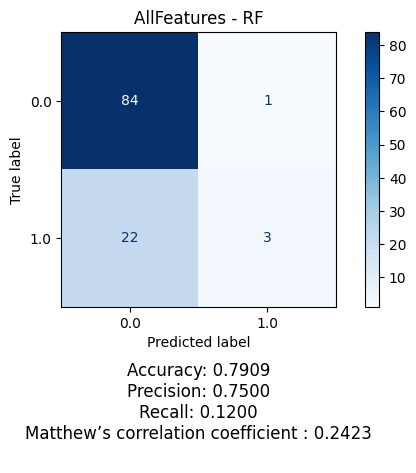

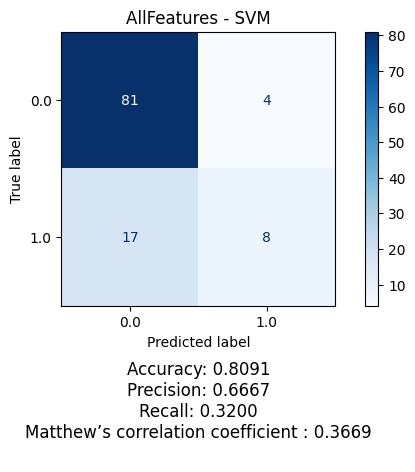

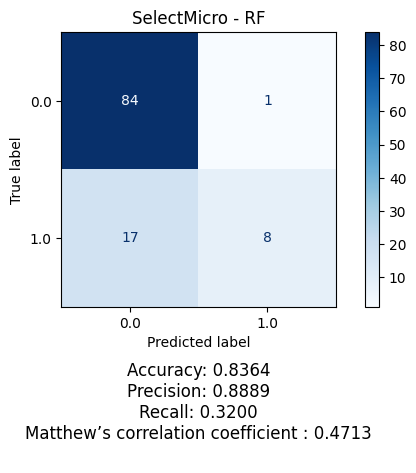

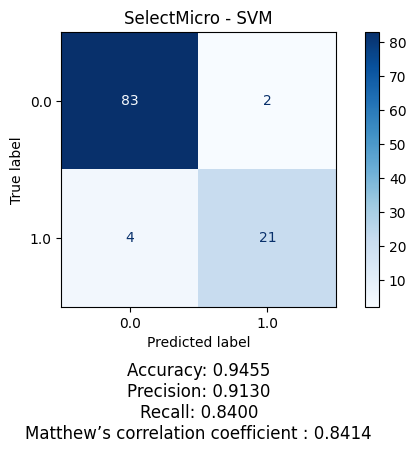

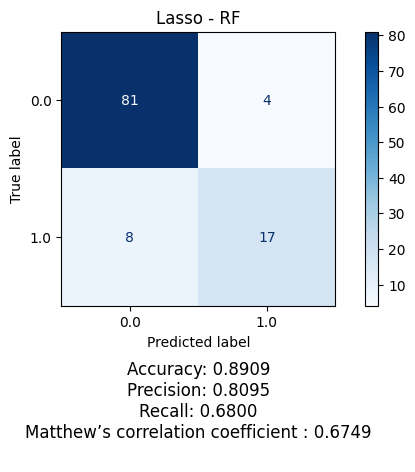

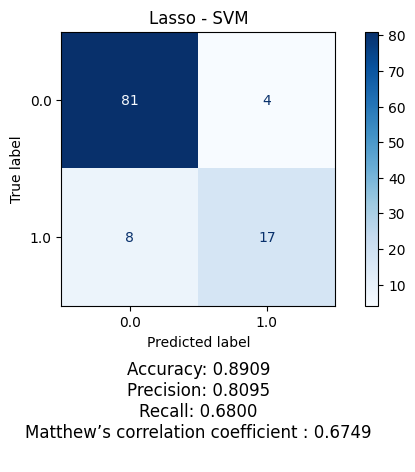

In [42]:
for dataset_name, classifiers in data_loaded.items():
        for classifier_name, labels in classifiers.items():
            actual_labels = labels[0]
            predicted_labels = labels[1]
            metric.plot_confusion_matrices(actual_labels, predicted_labels,f"{dataset_name} - {classifier_name}",pos_y=1)

## compare the first 15 index

In [46]:
ASV = X_IBD.T

In [47]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

entries=15
selectedOTU_index_15=selectedOTU_index[:entries]
X_FS_15=data[:,selectedOTU_index_15]

df=pd.DataFrame(data=X_FS_15)
selectedASVs=[ASV[i] for i in selectedOTU_index_15]

print(set(targetLabel))


{0, 1}


In [52]:
len(selectedASVs)

15

In [53]:
RunML.plotPresenseRatio(X_FS_15,targetLabel,selectedASVs,posLabel='1',posText="Low",negText="High",entries=entries)


TypeError: '>' not supported between instances of 'str' and 'float'